[0.99810493 0.62491233 0.58131453 0.45596325]


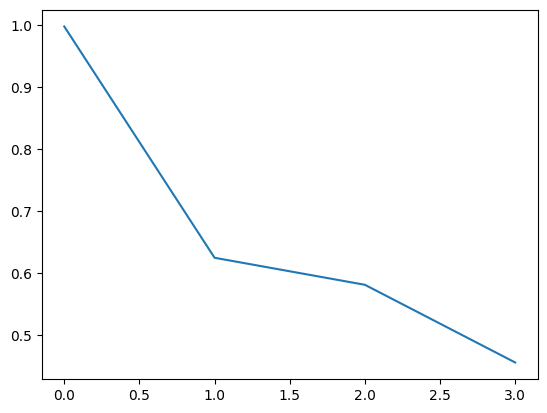

In [5]:
import pandas as pd

data = pd.read_csv('../Housing.csv')

Xdata = data[['price','area', 'bedrooms', 'bathrooms', 'stories']].to_numpy()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

Xscaled = StandardScaler().fit_transform(Xdata)

yscaled = Xscaled[:, 0]
Xf = Xscaled[:, 1:]

numXp = 100

MSE = np.zeros((4,numXp))

for k in range(4):
  for i in range(numXp):

    Xftrain, Xftest, ytrain, ytest = train_test_split(Xf, yscaled, test_size=1)

    reg = LinearRegression().fit(Xftrain[:,:k+1], ytrain)

    prediction = reg.predict(Xftest[:,:k+1])

    MSE[k,i] = mean_squared_error(prediction, ytest)

averageMSE = np.mean(MSE, axis=1)

print(averageMSE)

plt.plot(averageMSE)
plt.show()